<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Sua Cidade*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade ________, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/france/ile-de-france/paris/2022-03-09/visualisations/listings.csv", index_col=[0])

df.dtypes


name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

## Análise dos Dados


**Dicionário das variáveis**

* name - nome da propriedade anunciada
* host_id - número de id do proprietário (anfitrião) da propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - esta coluna não contém nenhum valor válido
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para reservar
* number_of_reviews - número de reviews que a propriedade possui
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
3189532,VIEW! SUN! SILENCE! SPACE! 11ème!,2987420,Mathieu,NaN,Popincourt,48.868549,2.377758,Entire home/apt,90,4,3,2022-03-06,1.18,1,62,3,7511105987553
3288986,Lovely Flat Saint-Germain/Odeon,15919106,Théo,NaN,Luxembourg,48.856840,2.335390,Entire home/apt,190,2,144,2022-02-13,1.53,1,284,12,7510600075343
3079808,"110 m2, Centre Paris-Marais, 4 pers",5329959,Hélène,NaN,Bourse,48.866960,2.352810,Entire home/apt,250,2,42,2022-01-02,0.44,1,300,1,7510300426309
3080167,Cosy Apartment Promenade des Arts,4949756,Philippe,NaN,Reuilly,48.849180,2.372020,Entire home/apt,90,365,0,NaN,NaN,1,0,0,NaN
3289756,LOFT 140m² TERRASSE,16621346,David,NaN,Buttes-Chaumont,48.875810,2.387910,Entire home/apt,250,5,12,2022-01-05,0.13,1,294,2,7511903078521


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print(f"Entradas: {df.shape[0]}")
print(f"Variáveis: {df.shape[1]}")

# verificar as 5 primeiras entradas do dataset
df.dtypes

Entradas: 51305
Variáveis: 17


name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

# Nova seção

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.434363
last_review                       0.209941
reviews_per_month                 0.209941
host_name                         0.001481
name                              0.000799
longitude                         0.000000
room_type                         0.000000
host_id                           0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
latitude                          0.000000
neighbourhood                     0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

In [ ]:
# plotar o histograma das variáveis numéricas
df_clean = df.copy()
df_clean.drop(['neighbourhood_group'], axis=1, inplace=True)

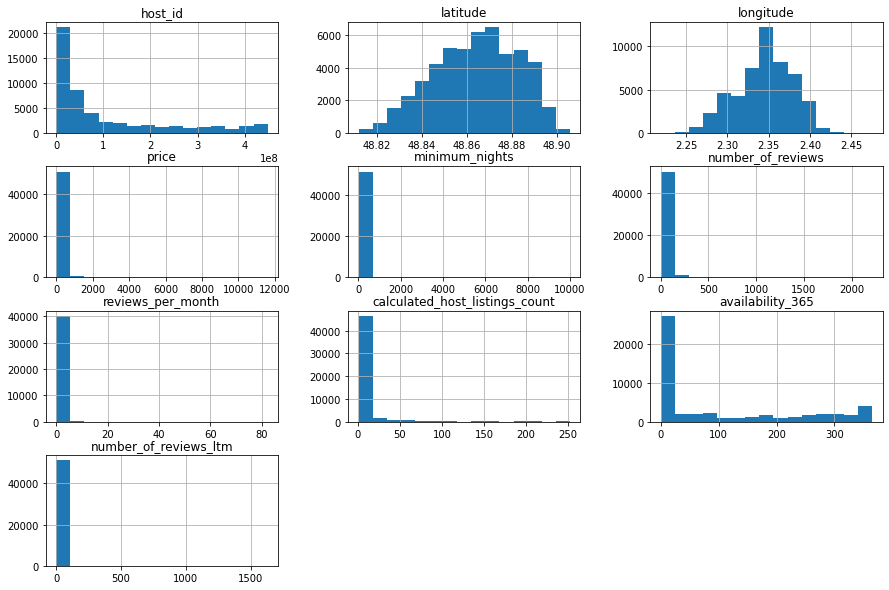

In [ ]:
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``
df_clean.price.mean()


136.79499074164312

### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
corr

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.075161,-0.014224,0.015416,0.119545,0.132765
minimum_nights,-0.075161,1.000000,-0.191271,-0.236186,-0.122646,-0.226209
number_of_reviews,-0.014224,-0.191271,1.000000,0.610321,-0.024982,0.127405
reviews_per_month,0.015416,-0.236186,0.610321,1.000000,0.067698,0.231607
calculated_host_listings_count,0.119545,-0.122646,-0.024982,0.067698,1.000000,0.185964
availability_365,0.132765,-0.226209,0.127405,0.231607,0.185964,1.000000


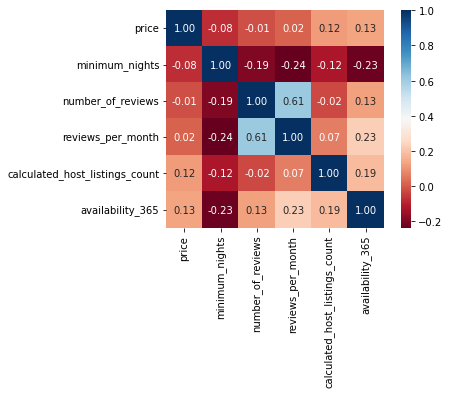

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    42490
Private room        7327
Hotel room          1145
Shared room          343
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.828184
Private room       0.142813
Hotel room         0.022318
Shared room        0.006686
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
Élysée            263.653351
Bourse            215.962377
Louvre            204.830688
Luxembourg        196.869265
Palais-Bourbon    194.536350
Passy             189.977339
Temple            184.332757
Hôtel-de-Ville    178.740741
Opéra             159.924225
Panthéon          155.721709
Name: price, dtype: float64

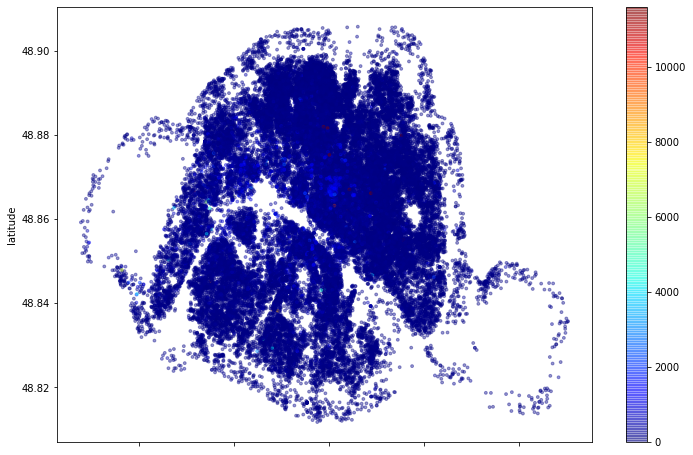

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(
  kind="scatter", 
  x='longitude', 
  y='latitude', 
  alpha=0.4, 
  c=df_clean['price'], 
  s=8,    
  cmap=plt.get_cmap('jet'), 
  figsize=(12,8)
);

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

101.90190039957119

## Conclusões


Com uma análise superficial dos dados do Airbnb para a cidade de páris, podemos tirar proveitos de algumas informações interessantes.

Paris é uma cidade que possui 82% de alugueis disponíveis como casa ou apartamentos inteiros e média de preço por noite do aluguel é de 136 Euros.

Interessante também perceber que a média da quantidade de noites alugadas pelas pessoas é de um poucos mais de 100 dias. Sendo assim, podemos fazer uma especulação sobre a cidade.

Paris recebe em média de 3 a 5 milhões de turistas anuais de acordo com o site do correio braziliense. Quantos desses aluguéis são feitos por turistas? E se a resposta for boa parte deles, podemos concluir que em médias a pessoas ficam 3 meses em Paris com quartos alugados pelo Airbnb.